# We are trying to predict whether a patient might have Diabetes or not based on the given features

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,accuracy_score,precision_score,f1_score


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization 
# Batch normalization is applied between two dense layers. It normalizes the axtivation of previous layer at each batch
# i.e it applies transformation that manintains the mean activation close to 0 and the standard deviation close to 1 


In [6]:
data=pd.read_csv('C:/Users/ravin/Downloads/diabetes1.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Basic checks

In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [14]:
data.Outcome.value_counts()
# THe outcome has imbalanced data we can either increase the data using SMOTE or reduce the data

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
data.columns.drop

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

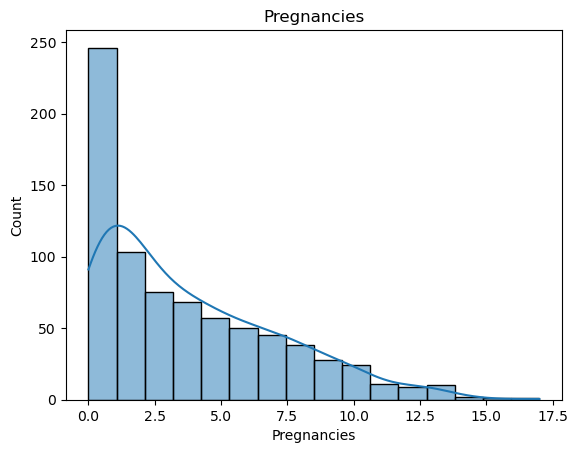

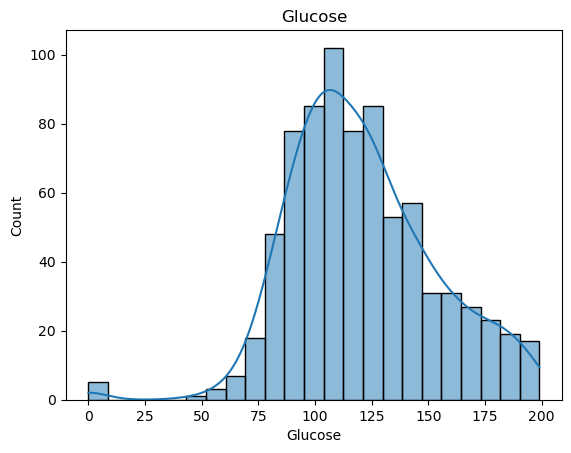

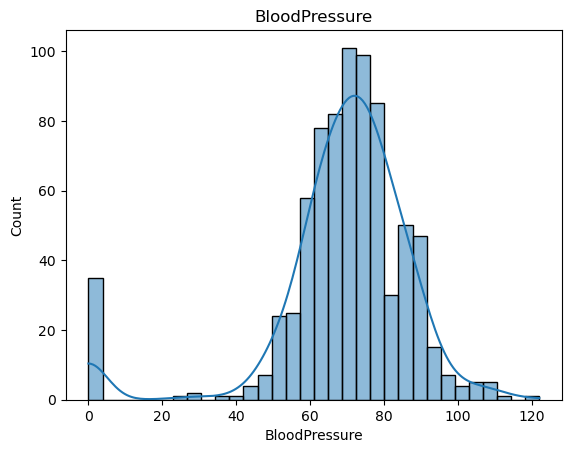

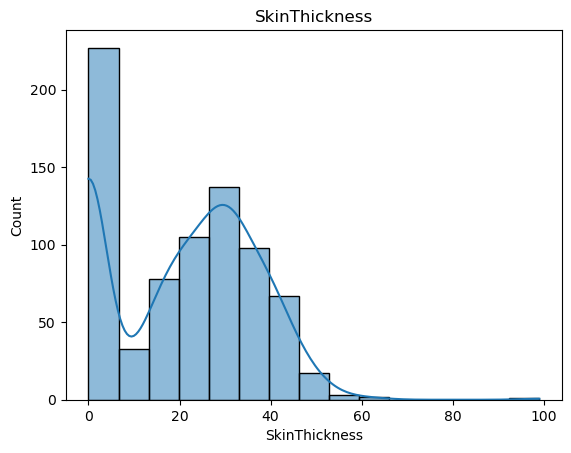

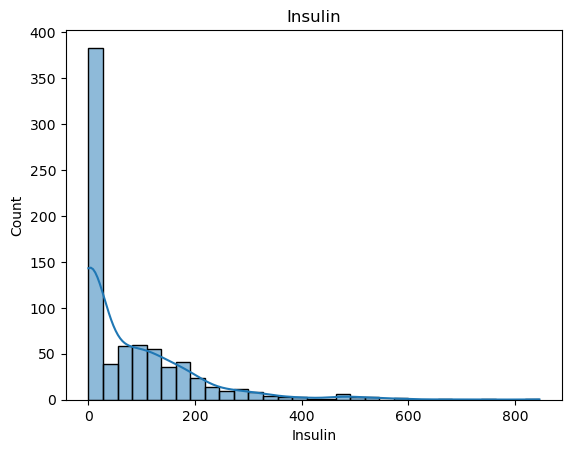

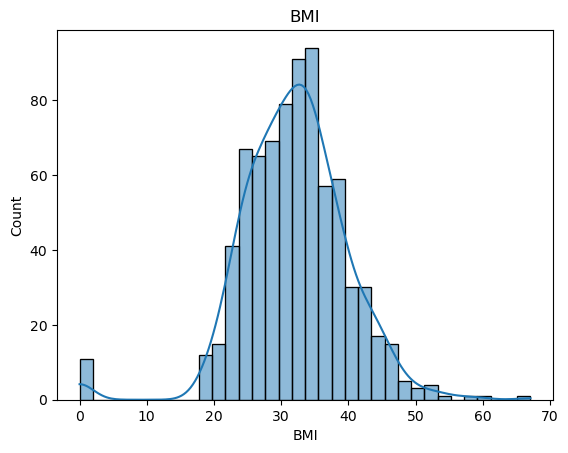

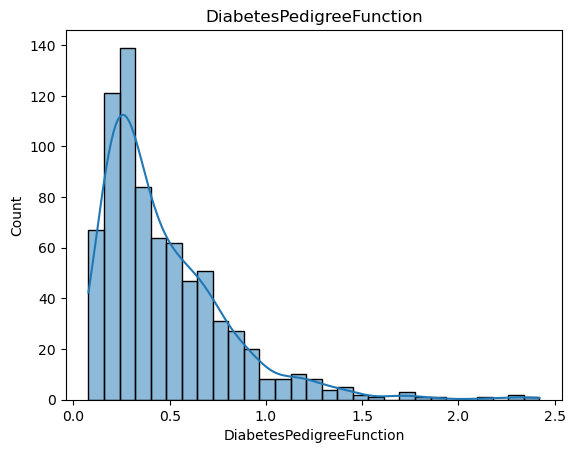

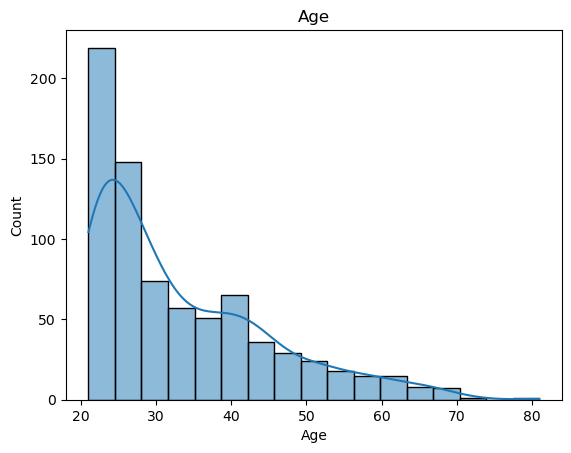

In [26]:
# All the columns are numerical columns so plotting a histogram plot for all the independent and dependent variables
for column in data.columns.drop('Outcome'):
    sns.histplot(data[column],kde=True)
    plt.title(column)
    plt.show()
    

In [27]:
# The features seems to be skewed so it it bettwe to Standardize the data 
# There are few outliers which needs to be removed.

In [29]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)
x_train.shape,x_test.shape

((576, 8), (192, 8))

In [69]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
269,2,146,0,0,0,27.5,0.240,28
31,3,158,76,36,245,31.6,0.851,28
183,5,73,60,0,0,26.8,0.268,27
373,2,105,58,40,94,34.9,0.225,25
589,0,73,0,0,0,21.1,0.342,25
...,...,...,...,...,...,...,...,...
98,6,93,50,30,64,28.7,0.356,23
322,0,124,70,20,0,27.4,0.254,36
382,1,109,60,8,182,25.4,0.947,21
365,5,99,54,28,83,34.0,0.499,30


In [65]:
# Since the data is imbalance we can do random undersampling or oversampling using SMOTE from imblearn lirbary
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=123)
x_rus,y_rus=rus.fit_resample(x_train,y_train)
print(y_train.value_counts())
print(y_rus.value_counts())
x_rus.shape,y_rus.shape

0    381
1    195
Name: Outcome, dtype: int64
0    195
1    195
Name: Outcome, dtype: int64


((390, 8), (390,))

In [40]:
from collections import Counter
print(f'Original Data set contain:{Counter(y)}')
print(f'Imbalanced training Data set contain:{Counter(y_train)}')
print(f'Balanced training Data set contain:{Counter(y_rus)}')

Original Data set contain:Counter({0: 500, 1: 268})
Imbalanced training Data set contain:Counter({0: 381, 1: 195})
Balanced training Data set contain:Counter({0: 195, 1: 195})


In [67]:
# Scaling the Data 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_rus)
x_test_scaled=ss.transform(x_test)

x_test_scaled.shape

(192, 8)

In [52]:
x_trained_df=pd.DataFrame(data=x_train_scaled,columns=x_train.columns)
x_test_df=pd.DataFrame(data=x_test_scaled,columns=x_test.columns)
x_trained_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.133131,-0.704594,-0.263095,1.527662,-0.034781,1.021228,0.035825,-1.118305
1,1.685244,-1.744891,1.850438,0.097870,-0.283120,0.346739,-0.602011,1.146447
2,-0.005781,0.060331,0.944638,-0.648109,0.624603,0.214487,0.344163,-0.508564
3,-0.005781,-1.285936,0.843994,-0.150790,-0.702728,-0.473227,-0.505277,0.014071
4,-0.287619,-0.276236,-3.483716,-1.331922,-0.702728,-1.240292,-0.898257,-0.944093
...,...,...,...,...,...,...,...,...
385,-1.133131,-0.123251,-0.162450,0.533024,0.710237,0.188036,-0.849890,-0.073035
386,-1.133131,1.926747,0.642705,-0.461614,0.881506,-0.116145,0.598089,-1.031199
387,0.839731,-0.551609,0.240127,-1.331922,-0.702728,-0.433551,-0.695721,-0.247247
388,-1.133131,-0.031460,0.038838,-0.088625,-0.702728,-0.724507,-0.695721,0.188283


In [71]:
x_trained_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,3.900000e+02,3.900000e+02,3.900000e+02,3.900000e+02,390.000000,3.900000e+02,3.900000e+02,3.900000e+02
mean,3.643809e-17,-3.643809e-17,-2.277381e-16,1.366428e-16,0.000000,-4.372571e-16,2.004095e-16,7.287618e-17
std,1.001285e+00,1.001285e+00,1.001285e+00,1.001285e+00,1.001285,1.001285e+00,1.001285e+00,1.001285e+00
min,-1.133131e+00,-3.825486e+00,-3.483716e+00,-1.331922e+00,-0.702728,-4.348230e+00,-1.209618e+00,-1.118305e+00
25%,-8.512939e-01,-6.739966e-01,-2.630948e-01,-1.331922e+00,-0.702728,-6.550745e-01,-7.093243e-01,-7.698816e-01
50%,-2.876188e-01,-1.232509e-01,1.394828e-01,1.911172e-01,-0.441543,-1.034284e-02,-3.102989e-01,-2.472466e-01
75%,7.692719e-01,6.416736e-01,5.420605e-01,7.816835e-01,0.408377,5.318930e-01,5.074010e-01,6.238118e-01
max,3.658107e+00,2.263314e+00,1.951082e+00,2.584465e+00,5.120401,3.507578e+00,5.851924e+00,4.108045e+00


<Axes: >

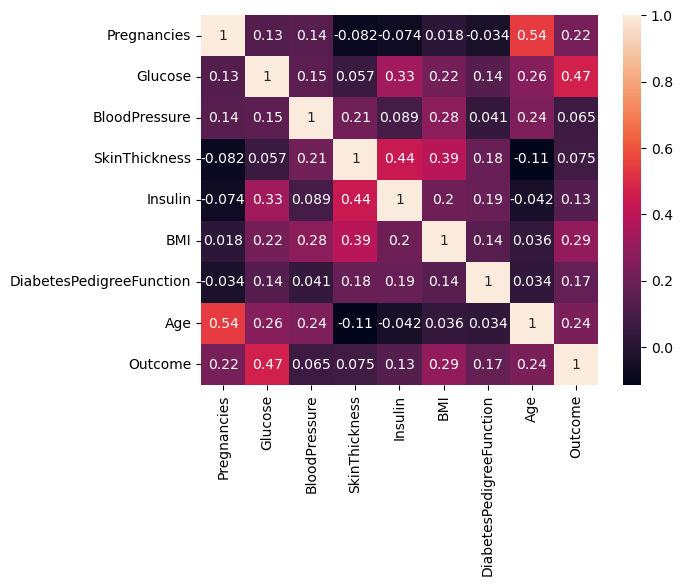

In [49]:
# Correlation plot
sns.heatmap(data.corr(),annot=True)

# Modelling 
Model 1: Hidden layer 1(4), optimizer= SGD, epochs=10

Hidden Layers=1
No.of Neurons=4


In [86]:
# Initialize the model
model1=Sequential()

# Input layer prepared to take 8 inputs
model1.add(Dense(8, activation='relu',input_shape=(8,)))

# Hidden layer with 4 Neurons 
model1.add(Dense(4,activation='relu'))

# Output layer using sigmoid since there are binary output
model1.add(Dense(1,activation='sigmoid'))

# Compiling the model

model1.compile(optimizer='sgd',
               loss='binary_crossentropy',
              metrics=['accuracy'])

history=model1.fit(x_train_scaled,y_rus,epochs=10,validation_data=(x_test_scaled,y_test),batch_size=1,verbose=2)

# Printing the accuracy of the model after 10th Epoch 
score_train=model1.evaluate(x_train_scaled,y_rus,verbose=0)
print(f'The training accuracy score after 10 epochs is {score_train[1]*100}')

# Prining the validation score 
score_test=model1.evaluate(x_test_scaled,y_test,verbose=0)
print(f'The testing accuracy of the mode is {score_test[1]*100}')

Epoch 1/10
390/390 - 2s - loss: 0.5919 - accuracy: 0.6923 - val_loss: 0.5655 - val_accuracy: 0.7240 - 2s/epoch - 5ms/step
Epoch 2/10
390/390 - 1s - loss: 0.5344 - accuracy: 0.7256 - val_loss: 0.5354 - val_accuracy: 0.7448 - 1s/epoch - 3ms/step
Epoch 3/10
390/390 - 1s - loss: 0.5089 - accuracy: 0.7513 - val_loss: 0.5054 - val_accuracy: 0.7604 - 1s/epoch - 3ms/step
Epoch 4/10
390/390 - 1s - loss: 0.4992 - accuracy: 0.7641 - val_loss: 0.5194 - val_accuracy: 0.7604 - 1s/epoch - 3ms/step
Epoch 5/10
390/390 - 1s - loss: 0.4883 - accuracy: 0.7359 - val_loss: 0.5006 - val_accuracy: 0.7760 - 1s/epoch - 3ms/step
Epoch 6/10
390/390 - 1s - loss: 0.4865 - accuracy: 0.7487 - val_loss: 0.5129 - val_accuracy: 0.7604 - 1s/epoch - 3ms/step
Epoch 7/10
390/390 - 1s - loss: 0.4794 - accuracy: 0.7385 - val_loss: 0.5207 - val_accuracy: 0.7604 - 1s/epoch - 3ms/step
Epoch 8/10
390/390 - 1s - loss: 0.4773 - accuracy: 0.7359 - val_loss: 0.5197 - val_accuracy: 0.7552 - 1s/epoch - 3ms/step
Epoch 9/10
390/390 - 1s 

In [117]:
# Defining a custom plot of Accuracy and Loss for epoch 
def Plot_the_performance(history):
    accuracy=(np.array(history.history['accuracy'])*100)
    validation_acc=(np.array(history.history['val_accuracy'])*100)
    loss=np.array(history.history['loss'])
    val_loss=np.array(history.history['val_loss'])
    
    x=range(1,len(accuracy)+1)
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(x,accuracy,label='Training accuracy(%)',color='b')
    plt.plot(x,validation_acc,label='validation accuracy(%)',color='r')
    plt.xlabel('Epochs')
    plt.ylabel( 'accuray (%)')
    plt.title("Training and validation accuracy")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(x,loss,color='b',label="Training loss")
    plt.plot(x,val_loss,color='r',label='Validation loss')
    plt.title('training and validation loss')
    plt.xlabel("Epochs")
    plt.ylabel("loss")
    plt.legend()
    plt.show()
    plt.tight_layout()
    

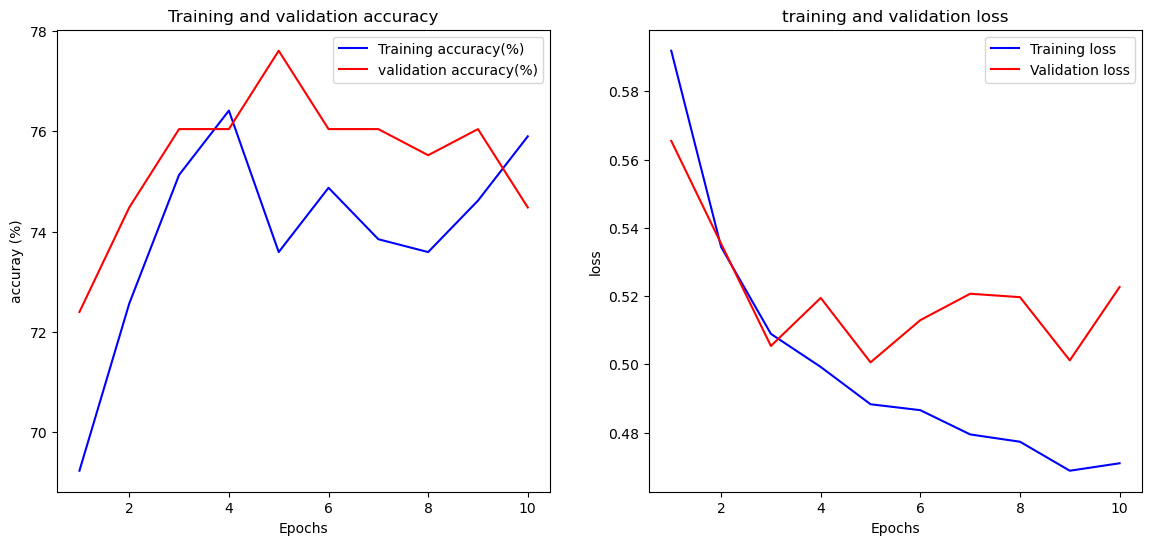

<Figure size 640x480 with 0 Axes>

In [118]:
Plot_the_performance(history)

# Model 2 Hidden layers 2(16,6),epochs=10,activation='relu'
Two hidden layers with 16 and 6 neurons

In [123]:
model2=Sequential()
model2.add(Dense(24,activation='relu'))
model2.add(Dense(16,activation='relu'))
model2.add(Dense(6,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history2=model2.fit(x_train_scaled,y_rus,epochs=10,batch_size=1,validation_data=(x_test_scaled,y_test),verbose=1)

score_train=model2.evaluate(x_train_scaled,y_rus)
print(f'The training accuracy score after 10 epochs is {score_train[1]*100}')

score_test=model2.evaluate(x_test_scaled,y_test)
print(f'The testing accuracy score after 10 epochs is {score_test[1]*100}')

Epoch 1/10
390/390 [==============================] - 2s 3ms/step - loss: 0.6833 - accuracy: 0.5128 - val_loss: 0.6665 - val_accuracy: 0.6042
Epoch 2/10
390/390 [==============================] - 1s 3ms/step - loss: 0.6361 - accuracy: 0.7077 - val_loss: 0.5973 - val_accuracy: 0.7552
Epoch 3/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5756 - accuracy: 0.7205 - val_loss: 0.5313 - val_accuracy: 0.7865
Epoch 4/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5376 - accuracy: 0.7205 - val_loss: 0.5178 - val_accuracy: 0.7812
Epoch 5/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5099 - accuracy: 0.7513 - val_loss: 0.5298 - val_accuracy: 0.7604
Epoch 6/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5030 - accuracy: 0.7333 - val_loss: 0.4910 - val_accuracy: 0.7917
Epoch 7/10
390/390 [==============================] - 1s 3ms/step - loss: 0.4923 - accuracy: 0.7590 - val_loss: 0.4900 - val_accuracy: 0.7969
Epoch 

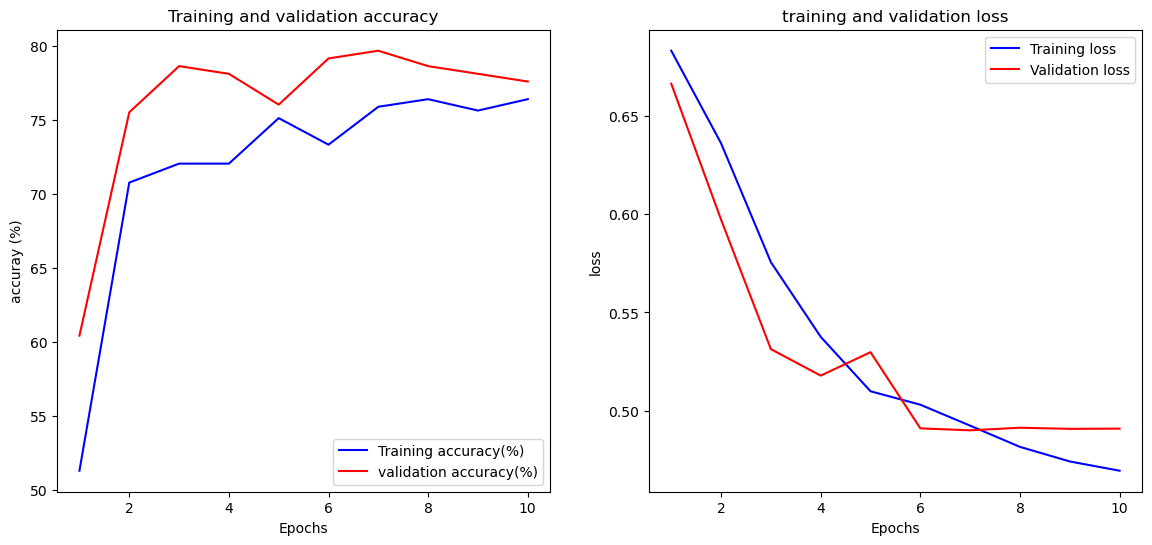

<Figure size 640x480 with 0 Axes>

In [124]:
Plot_the_performance(history2)

# Model 3: Hidden layers=2(16,6),optimizaer=adam

In [129]:
model3=Sequential()

model3.add(Dense(24,activation='relu'))
model3.add(Dense(16,activation='relu'))
model3.add(Dense(6,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

model3.compile(optimizer='adam',
                       metrics=['accuracy'],
                       loss='binary_crossentropy')

history3=model3.fit(x_train_scaled,y_rus,epochs=10,batch_size=1,validation_data=(x_test_scaled,y_test),verbose=1)

score_train=model3.evaluate(x_train_scaled,y_rus)
print(f'The training accuracy score after 10 epochs is {score_train[1]*100}')
score_test=model3.evaluate(x_test_scaled,y_test)
print(f'The testing accuracy score after 10 epochs is {score_test[1]*100}')



Epoch 1/10
390/390 [==============================] - 2s 3ms/step - loss: 0.6409 - accuracy: 0.6436 - val_loss: 0.6377 - val_accuracy: 0.7656
Epoch 2/10
390/390 [==============================] - 1s 3ms/step - loss: 0.6016 - accuracy: 0.7077 - val_loss: 0.6306 - val_accuracy: 0.7656
Epoch 3/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5733 - accuracy: 0.7333 - val_loss: 0.6500 - val_accuracy: 0.7448
Epoch 4/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5571 - accuracy: 0.7385 - val_loss: 0.6160 - val_accuracy: 0.7656
Epoch 5/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5453 - accuracy: 0.7564 - val_loss: 0.6121 - val_accuracy: 0.7448
Epoch 6/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5295 - accuracy: 0.7718 - val_loss: 0.6137 - val_accuracy: 0.7500
Epoch 7/10
390/390 [==============================] - 1s 3ms/step - loss: 0.5160 - accuracy: 0.7744 - val_loss: 0.6304 - val_accuracy: 0.7448
Epoch 

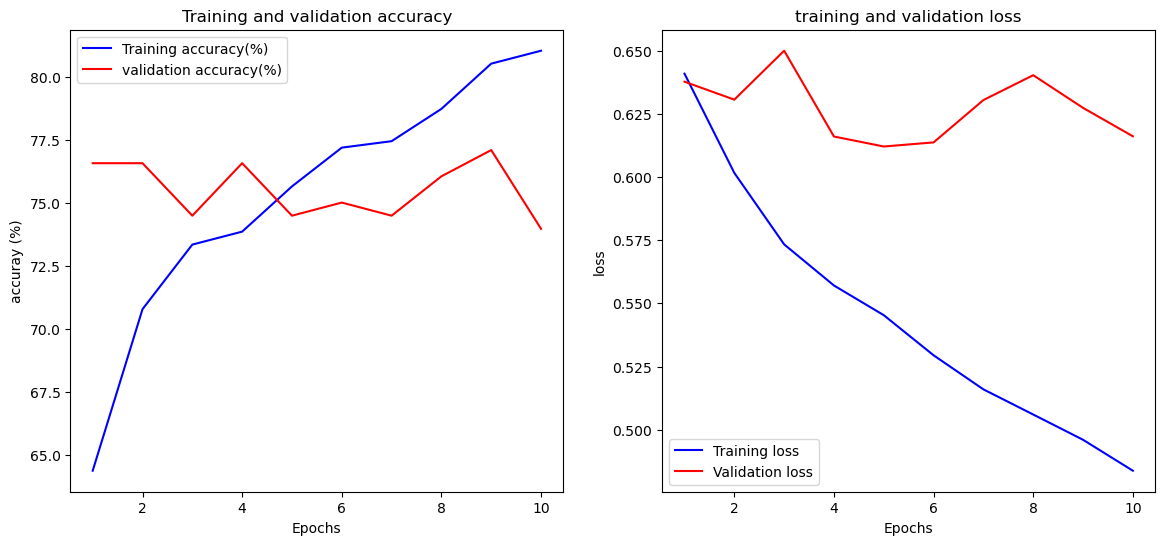

<Figure size 640x480 with 0 Axes>

In [130]:
Plot_the_performance(history3)

# Model is getting overfitted 

model4=Model3+ elastics net regularization

In [133]:
model4=Sequential()
model4.add(Dense(24,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.01,l2=0.01)))
model4.add(Dense(16,activation='relu',kernel_regularizer=keras.regularizers.l2(l2=0.05)))
model4.add(Dense(6,activation='relu'))
model4.add(Dense(1,activation='sigmoid'))

model4.compile(optimizer='adam',
              metrics=['accuracy'],
              loss='binary_crossentropy')

history4=model4.fit(x_train_scaled,y_rus,epochs=20,batch_size=1,validation_data=(x_test_scaled,y_test),verbose=1)

score_train=model4.evaluate(x_train_scaled,y_rus)
print(f'The training accuracy score after 10 epochs is {score_train[1]*100}')
score_test=model4.evaluate(x_test_scaled,y_test)
print(f'The testing accuracy score after 10 epochs is {score_test[1]*100}')
           
           

Epoch 1/20
390/390 [==============================] - 2s 3ms/step - loss: 1.3613 - accuracy: 0.5462 - val_loss: 0.8881 - val_accuracy: 0.7031
Epoch 2/20
390/390 [==============================] - 1s 3ms/step - loss: 0.7837 - accuracy: 0.6590 - val_loss: 0.6731 - val_accuracy: 0.7865
Epoch 3/20
390/390 [==============================] - 1s 3ms/step - loss: 0.6782 - accuracy: 0.7154 - val_loss: 0.6186 - val_accuracy: 0.7760
Epoch 4/20
390/390 [==============================] - 1s 3ms/step - loss: 0.6452 - accuracy: 0.7333 - val_loss: 0.5987 - val_accuracy: 0.7760
Epoch 5/20
390/390 [==============================] - 1s 3ms/step - loss: 0.6286 - accuracy: 0.7231 - val_loss: 0.5901 - val_accuracy: 0.7552
Epoch 6/20
390/390 [==============================] - 1s 3ms/step - loss: 0.6107 - accuracy: 0.7410 - val_loss: 0.5791 - val_accuracy: 0.7760
Epoch 7/20
390/390 [==============================] - 1s 3ms/step - loss: 0.5984 - accuracy: 0.7513 - val_loss: 0.5817 - val_accuracy: 0.7448
Epoch 

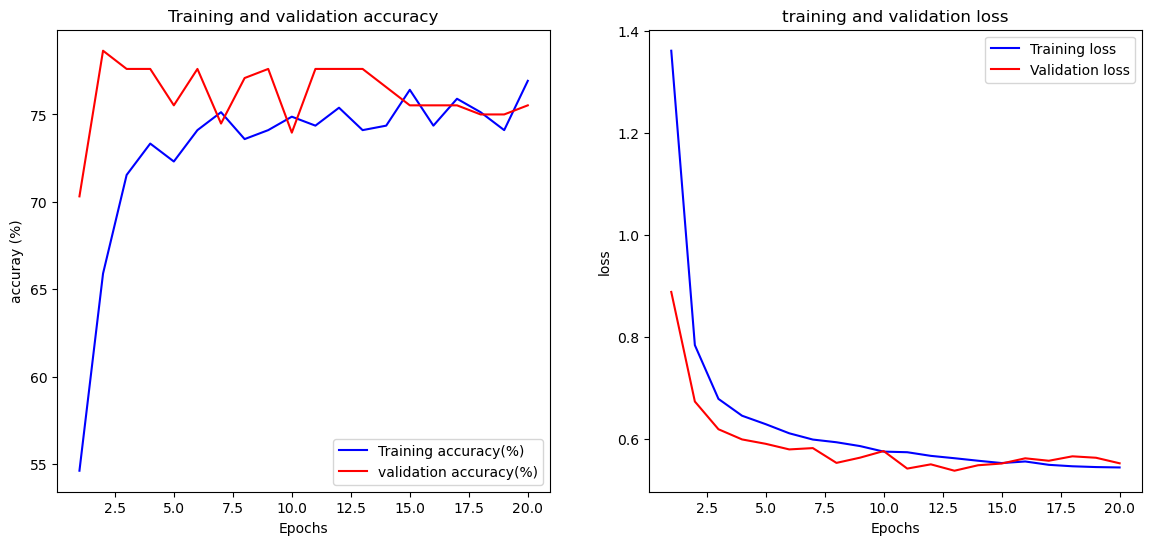

<Figure size 640x480 with 0 Axes>

In [134]:
Plot_the_performance(history4)

The regularization has solved the overfitting problem but the validation accuracy has dropped

# Model3+ Bacth Normalization

Epoch 1/20
390/390 [==============================] - 2s 4ms/step - loss: 0.6567 - accuracy: 0.6256 - val_loss: 0.5751 - val_accuracy: 0.7188
Epoch 2/20
390/390 [==============================] - 1s 3ms/step - loss: 0.5559 - accuracy: 0.7308 - val_loss: 0.5098 - val_accuracy: 0.7500
Epoch 3/20
390/390 [==============================] - 1s 3ms/step - loss: 0.5027 - accuracy: 0.7641 - val_loss: 0.4980 - val_accuracy: 0.7708
Epoch 4/20
390/390 [==============================] - 1s 3ms/step - loss: 0.4864 - accuracy: 0.7590 - val_loss: 0.5271 - val_accuracy: 0.7552
Epoch 5/20
390/390 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7641 - val_loss: 0.5086 - val_accuracy: 0.7604
Epoch 6/20
390/390 [==============================] - 1s 3ms/step - loss: 0.4633 - accuracy: 0.7795 - val_loss: 0.5052 - val_accuracy: 0.7708
Epoch 7/20
390/390 [==============================] - 1s 3ms/step - loss: 0.4568 - accuracy: 0.7897 - val_loss: 0.5078 - val_accuracy: 0.7812
Epoch 

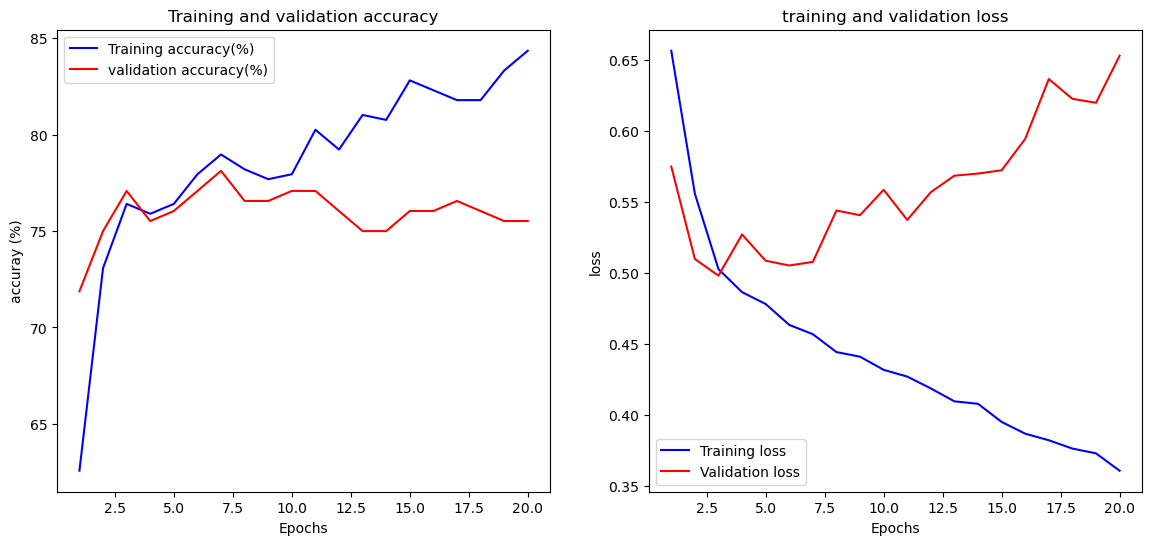

<Figure size 640x480 with 0 Axes>

In [148]:
model5=Sequential()
model5.add(Dense(24,activation='relu',input_shape=(8,)))
model.add(BatchNormalization())
model5.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model5.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model5.add(Dense(1,activation='sigmoid'))

model5.compile(optimizer='adam',
              metrics='accuracy',
              loss='binary_crossentropy')

history5=model5.fit(x_train_scaled,y_rus,epochs=20,batch_size=1,validation_data=(x_test_scaled,y_test),verbose=1)
score_train=model5.evaluate(x_train_scaled,y_rus)
print(f'The training accuracy score after 20 epochs is {score_train[1]*100}')
score_test=model5.evaluate(x_test_scaled,y_test)
print(f'The testing accuracy score after 20 epochs is {score_test[1]*100}')

Plot_the_performance(history5)

Batch Normalization hasn't reduced the overfitting but it has reduced the accuracy so we will not use it 

# Experimenting on Model 3 (optimier=sgd, hidden layers=2 (16,8),loss=binary_crossentropy,activation='relu' with  regularization terms

Epoch 1/20
13/13 [==============================] - 1s 4ms/step - loss: 2.5484 - accuracy: 0.5615
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 2.3584 - accuracy: 0.6333
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 2.1850 - accuracy: 0.6564
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 2.0273 - accuracy: 0.6692
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 1.8830 - accuracy: 0.6872
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 1.7510 - accuracy: 0.6897
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 1.6293 - accuracy: 0.7077
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 1.5176 - accuracy: 0.7205
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 1.4139 - accuracy: 0.7333
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 1.3189 - accuracy: 0.7333
Epoch 11/20
13/13 [

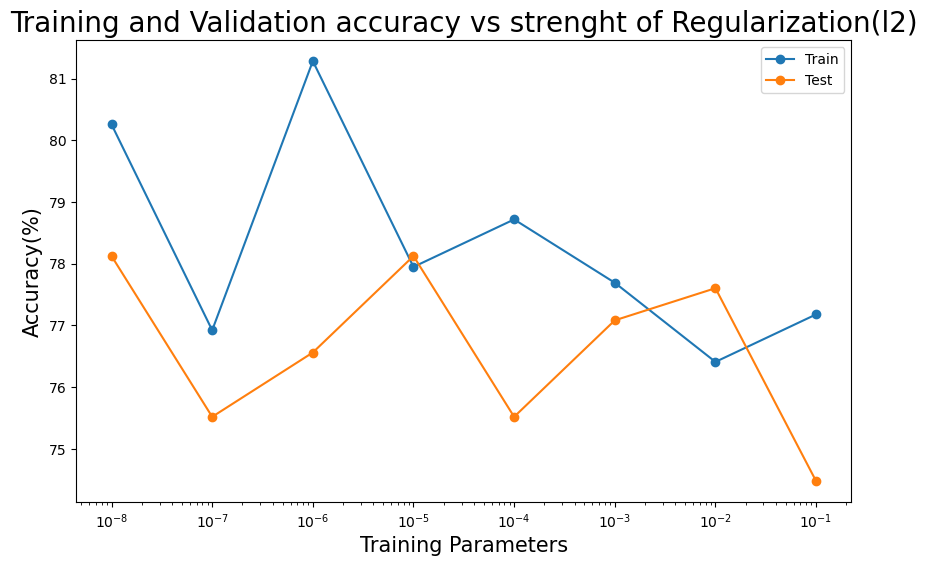

In [151]:
values=[1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]
train,test=list(),list()

for params in values:
    
    #Define model
    
    model = Sequential()
    
    model.add(Dense(24,activation='relu'))
    
    model.add(Dense(16,activation='relu',kernel_regularizer=keras.regularizers.L2(params)))
    
    model.add(Dense(8,activation='relu'))
    
    model.add(Dense(1,activation='sigmoid'))
    
    
    model.compile(optimizer='adam',
                 metrics='accuracy',
                 loss='binary_crossentropy')

    # Fit the model
    model.fit(x_train_scaled,y_rus,epochs=20,verbose=1)
    
    # Evaluate the model
    
    _,train_accuracy=model.evaluate(x_train_scaled,y_rus)
    _,test_accuracy=model.evaluate(x_test_scaled,y_test)
    
    print(f' The training score is {train_accuracy},testing score {test_accuracy}')
          
    
    train.append(train_accuracy*100)
    test.append(test_accuracy*100)
    
# Plot train and test accuracy

plt.figure(figsize=(10,6))
plt.semilogx(values,train,label='Train',marker='o')
plt.semilogx(values,test,label='Test',marker='o')
plt.title("Training and Validation accuracy vs strenght of Regularization(l2)",fontsize=20)
plt.xlabel("Training Parameters",fontsize=15)
plt.ylabel("Accuracy(%)",fontsize=15)
plt.legend()
plt.show()
    
          
    
    
    

# Experimenting on Model 3 (optimizer=sgd,hiden layer=2(16,8),loss=binary_crossentropy,activation='relu') with regulrization terms

Epoch 1/20
13/13 [==============================] - 1s 3ms/step - loss: 0.6998 - accuracy: 0.5026
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.5205
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.5590
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.5974
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6385
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.6872
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6077 - accuracy: 0.7205
Epoch 8/20
13/13 [==============================] - 0s 4ms/step - loss: 0.5991 - accuracy: 0.7333
Epoch 9/20
13/13 [==============================] - 0s 4ms/step - loss: 0.5913 - accuracy: 0.7308
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7359
Epoch 11/20
13/13 [

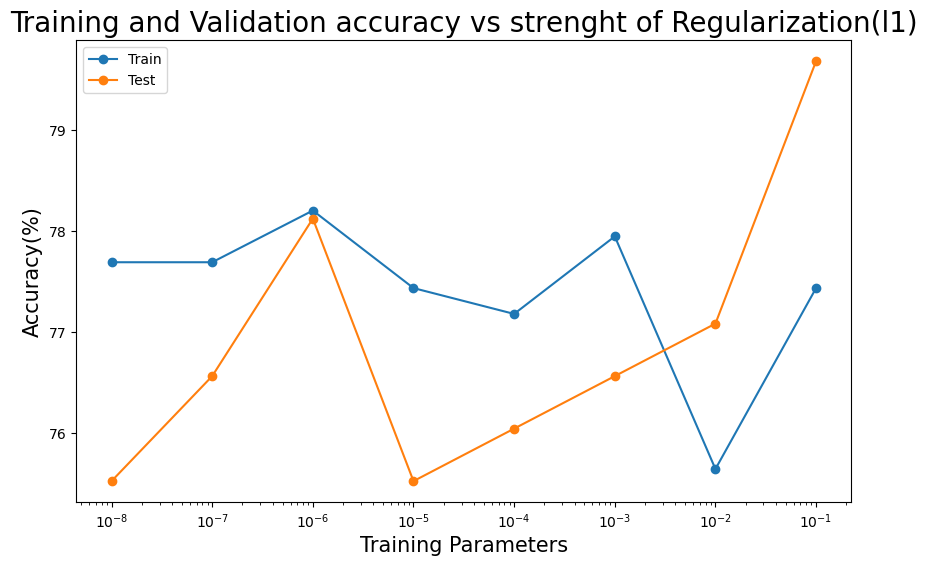

In [155]:
values=[1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08]
train,test=list(),list()

for param in values:
    
    model= Sequential()
    
    model.add(Dense(24,activation='relu'))
    
    model.add(Dense(16,activation='relu',kernel_regularizer=keras.regularizers.l2(params)))
    
    model.add(Dense(8,activation='relu'))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')
    
    model.fit(x_train_scaled,y_rus,epochs=20,verbose=1)
    
    _,train_acc = model.evaluate(x_train_scaled,y_rus)
    _,test_acc = model.evaluate(x_test_scaled,y_test)
    
    print(f' The training score is {train_accuracy},testing score {test_accuracy}')
    
    train.append(train_acc*100)
    test.append(test_acc*100)
   
 

plt.figure(figsize=(10,6))
plt.semilogx(values,train,label='Train',marker='o')
plt.semilogx(values,test,label='Test',marker='o')
plt.title("Training and Validation accuracy vs strenght of Regularization(l1)",fontsize=20)
plt.xlabel("Training Parameters",fontsize=15)
plt.ylabel("Accuracy(%)",fontsize=15)
plt.legend()
plt.show()
    